<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Projeto_modulo_3/rascunho_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from datetime import datetime

In [2]:
casos_full = pd.read_csv("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/caso_full.csv.gz?raw=true", 
                         compression = "gzip")

casos_full.loc[:,"date"] = pd.to_datetime(casos_full.loc[:,"date"], format = "%Y-%m-%d")

In [3]:
casos_wcota = pd.read_csv("https://github.com/wcota/covid19br/blob/master/cases-brazil-states.csv?raw=true")

casos_wcota.loc[:,"date"] = pd.to_datetime(casos_wcota.loc[:,"date"], format = "%Y-%m-%d")

In [4]:
cidade_sp = casos_full.query("city_ibge_code == '3550308'")
cidade_sp

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
2000296,São Paulo,3550308.0,2020-02-25,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0000,0,1,city,SP,1,0
2000298,São Paulo,3550308.0,2020-02-26,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0000,0,2,city,SP,0,0
2000300,São Paulo,3550308.0,2020-02-27,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0000,0,3,city,SP,0,0
2000302,São Paulo,3550308.0,2020-02-28,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-28,0.0000,0,4,city,SP,1,0
2000304,São Paulo,3550308.0,2020-02-29,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-29,0.0000,0,5,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271220,São Paulo,3550308.0,2021-06-25,202125,12325232.0,12252023.0,False,False,846987,6871.97612,2021-06-25,0.0391,33150,487,city,SP,3038,140
2271867,São Paulo,3550308.0,2021-06-26,202125,12325232.0,12252023.0,False,False,849498,6892.34896,2021-06-26,0.0391,33246,488,city,SP,2511,96
2272514,São Paulo,3550308.0,2021-06-27,202126,12325232.0,12252023.0,True,False,850593,6901.23318,2021-06-27,0.0391,33254,489,city,SP,1095,8
2273161,São Paulo,3550308.0,2021-06-28,202126,12325232.0,12252023.0,False,True,850593,6901.23318,2021-06-27,0.0391,33254,490,city,SP,0,0


In [5]:
sudo = ["Embu-Guaçu", "Itapecerica da Serra", "Embu das Artes", "Taboão da Serra",
        "Juquitiba", "São Lourenço da Serra", "Cotia", "Vargem Grande Paulista"]

# casos_full.query("city == @sudo").groupby(["date"]).sum()

In [6]:
cidade_sp.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
2000296,São Paulo,3550308.0,2020-02-25,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
2000298,São Paulo,3550308.0,2020-02-26,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
2000300,São Paulo,3550308.0,2020-02-27,202009,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0
2000302,São Paulo,3550308.0,2020-02-28,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-28,0.0,0,4,city,SP,1,0
2000304,São Paulo,3550308.0,2020-02-29,202009,12325232.0,12252023.0,False,False,2,0.01623,2020-02-29,0.0,0,5,city,SP,0,0


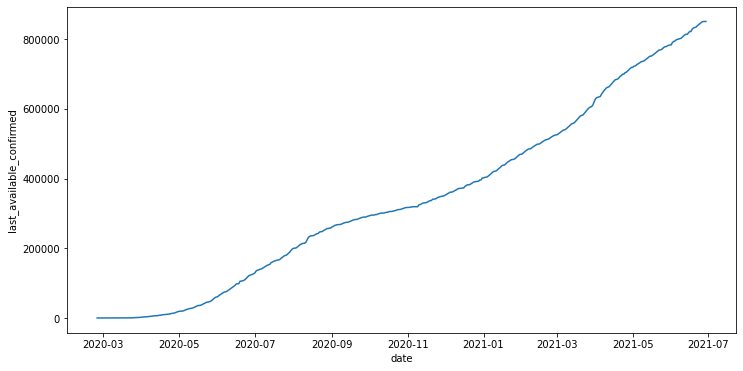

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(data = cidade_sp, x = "date", y = "last_available_confirmed")

In [8]:
cidade_sp.loc[:,"date"][:326]

2000296   2020-02-25
2000298   2020-02-26
2000300   2020-02-27
2000302   2020-02-28
2000304   2020-02-29
             ...    
2164465   2021-01-11
2165112   2021-01-12
2165759   2021-01-13
2166406   2021-01-14
2167053   2021-01-15
Name: date, Length: 326, dtype: datetime64[ns]

In [9]:
# feriados_originais = [
# '2020-02-25',
# '2020-02-26',
# '2020-04-10',
# '2020-04-21',
# '2020-05-01',
# '2020-06-11',
# '2020-07-09',
# '2020-09-07',
# '2020-10-12',
# '2020-11-02',
# '2020-11-15',
# '2020-11-20',
# '2020-12-25'
# ]

# feriados_originais = pd.DataFrame({
#     "holiday" : "sp_original",
#     "ds" : pd.to_datetime(feriados_originais)
# })

feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2020 = pd.DataFrame({
    "holiday" : "sp_novos",
    "ds" : pd.to_datetime(feriados_sp_2020)
})

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]

feriados_sp_2021 = pd.DataFrame({
  'holiday': 'sp_2021',
  'ds': pd.to_datetime(feriados_sp_2021)
})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [55]:
df_csp_casos = pd.DataFrame()
df_csp_casos.loc[:,"ds"] = cidade_sp.loc[:,"date"][:400] # data que começou a vacinação
df_csp_casos.loc[:,"y"] = cidade_sp.loc[:,"new_confirmed"][:400]

In [56]:
df_csp_casos_teste = pd.DataFrame()
df_csp_casos_teste.loc[:,"ds"] = cidade_sp.loc[:,"date"][400:]
df_csp_casos_teste.loc[:,"y"] = cidade_sp.loc[:,"new_confirmed"][400:]

In [57]:
df_csp_obitos = pd.DataFrame()
df_csp_obitos.loc[:,"ds"] = cidade_sp.loc[:,"date"][:400] # data que começou a vacinação
df_csp_obitos.loc[:,"y"] = cidade_sp.loc[:,"new_deaths"][:400]

In [58]:
df_csp_obitos_teste = pd.DataFrame()
df_csp_obitos_teste.loc[:,"ds"] = cidade_sp.loc[:,"date"][400:]
df_csp_obitos_teste.loc[:,"y"] = cidade_sp.loc[:,"new_deaths"][400:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


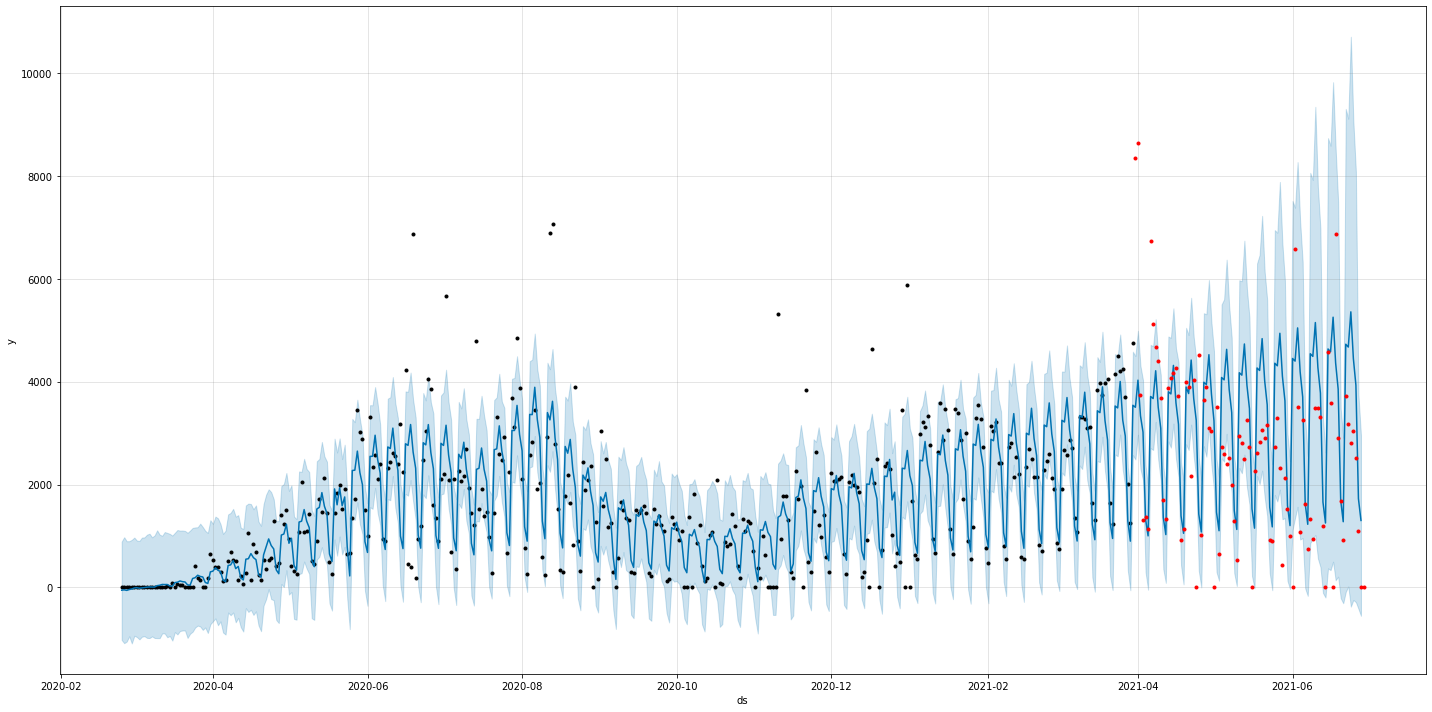

In [61]:
m1 = Prophet(changepoint_prior_scale = 10, seasonality_mode = "multiplicative", holidays = feriados)

m1.fit(df_csp_casos)
df_prev1 = m1.make_future_dataframe(periods = 90)

prev1 = m1.predict(df_prev1)

m1.plot(prev1, figsize = (20,10));
plt.plot(df_csp_casos_teste.loc[:,"ds"], df_csp_casos_teste.loc[:,"y"], "r.")

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


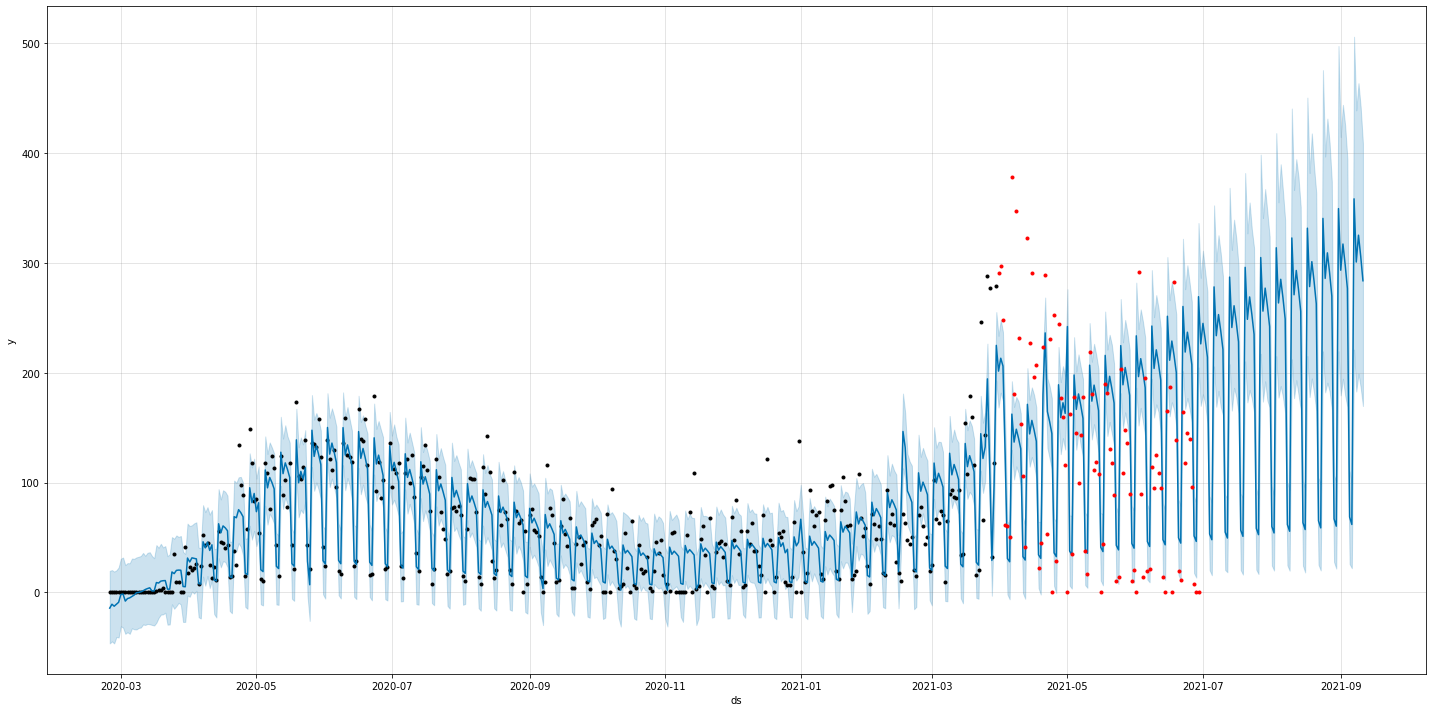

In [54]:
m2 = Prophet(changepoint_prior_scale = 0.5, holidays = feriados, seasonality_mode = "multiplicative")

m2.fit(df_csp_obitos)
df_prev2 = m2.make_future_dataframe(periods = 165)

prev2 = m2.predict(df_prev2)

m2.plot(prev2, figsize = (20,10));
plt.plot(df_csp_obitos_teste.loc[:,"ds"], df_csp_obitos_teste.loc[:,"y"], "r.")

In [16]:
cidade_sp.loc[:,"date"][:400]

2000296   2020-02-25
2000298   2020-02-26
2000300   2020-02-27
2000302   2020-02-28
2000304   2020-02-29
             ...    
2212343   2021-03-26
2212990   2021-03-27
2213637   2021-03-28
2214284   2021-03-29
2214931   2021-03-30
Name: date, Length: 400, dtype: datetime64[ns]

In [17]:
df_csp_casos = pd.DataFrame()
df_csp_casos.loc[:,"ds"] = cidade_sp.loc[:,"date"][:400] # treino
df_csp_casos.loc[:,"y"] = cidade_sp.loc[:,"new_confirmed"][:400]

In [18]:
df_csp_casos_teste = pd.DataFrame()
df_csp_casos_teste.loc[:,"ds"] = cidade_sp.loc[:,"date"][400:]
df_csp_casos_teste.loc[:,"y"] = cidade_sp.loc[:,"new_confirmed"][400:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


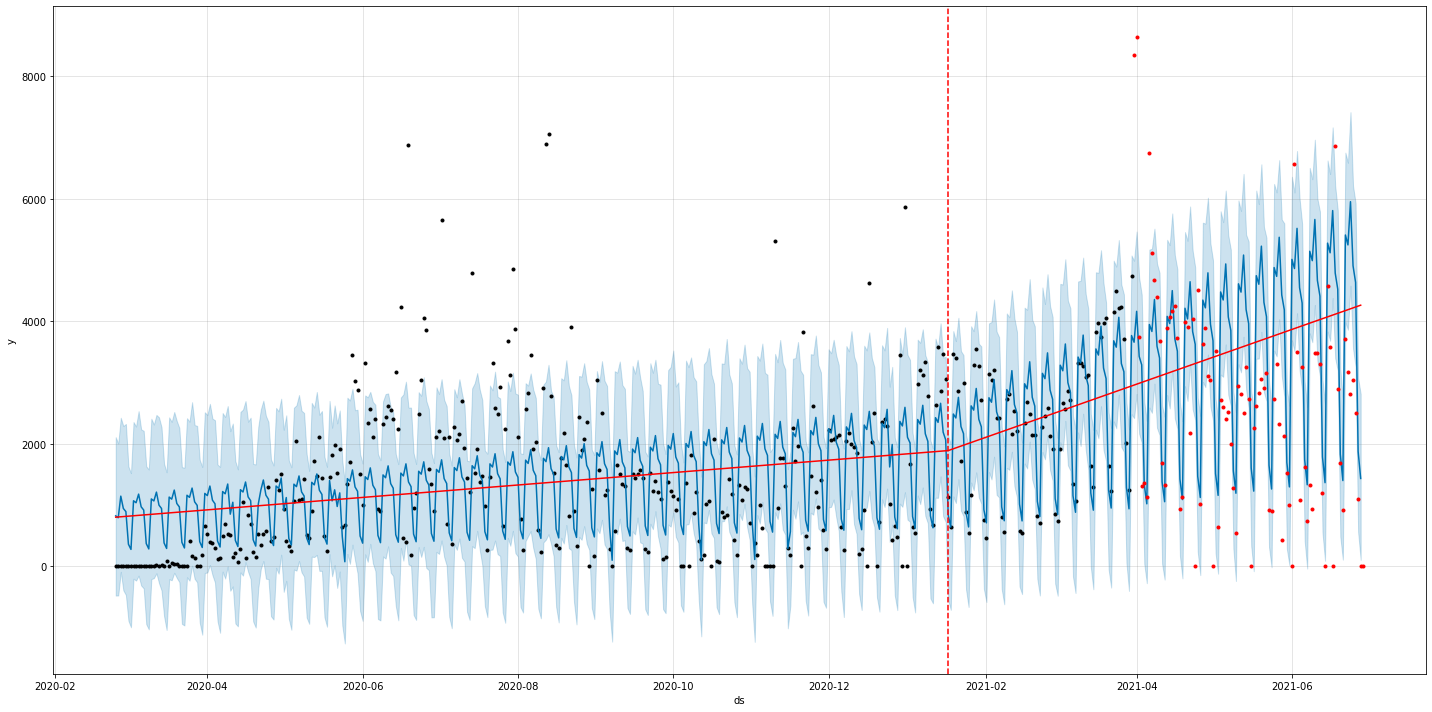

In [19]:
m3 = Prophet(holidays = feriados, seasonality_mode = "multiplicative",
             changepoints = ["17-01-2021"], changepoint_prior_scale = 10)

m3.fit(df_csp_casos)
df_prev3 = m3.make_future_dataframe(periods = 90)

prev3 = m3.predict(df_prev3)

fig = m3.plot(prev3, figsize = (20,10));
plt.plot(df_csp_casos_teste.loc[:,"ds"], df_csp_casos_teste.loc[:,"y"], "r.")
a = add_changepoints_to_plot(fig.gca(), m3, prev3);

In [20]:
df_csp_obitos = pd.DataFrame()
df_csp_obitos.loc[:,"ds"] = cidade_sp.loc[:,"date"][:400] # treino
df_csp_obitos.loc[:,"y"] = cidade_sp.loc[:,"new_deaths"][:400]

In [21]:
df_csp_obitos_teste = pd.DataFrame()
df_csp_obitos_teste.loc[:,"ds"] = cidade_sp.loc[:,"date"][400:]
df_csp_obitos_teste.loc[:,"y"] = cidade_sp.loc[:,"new_deaths"][400:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


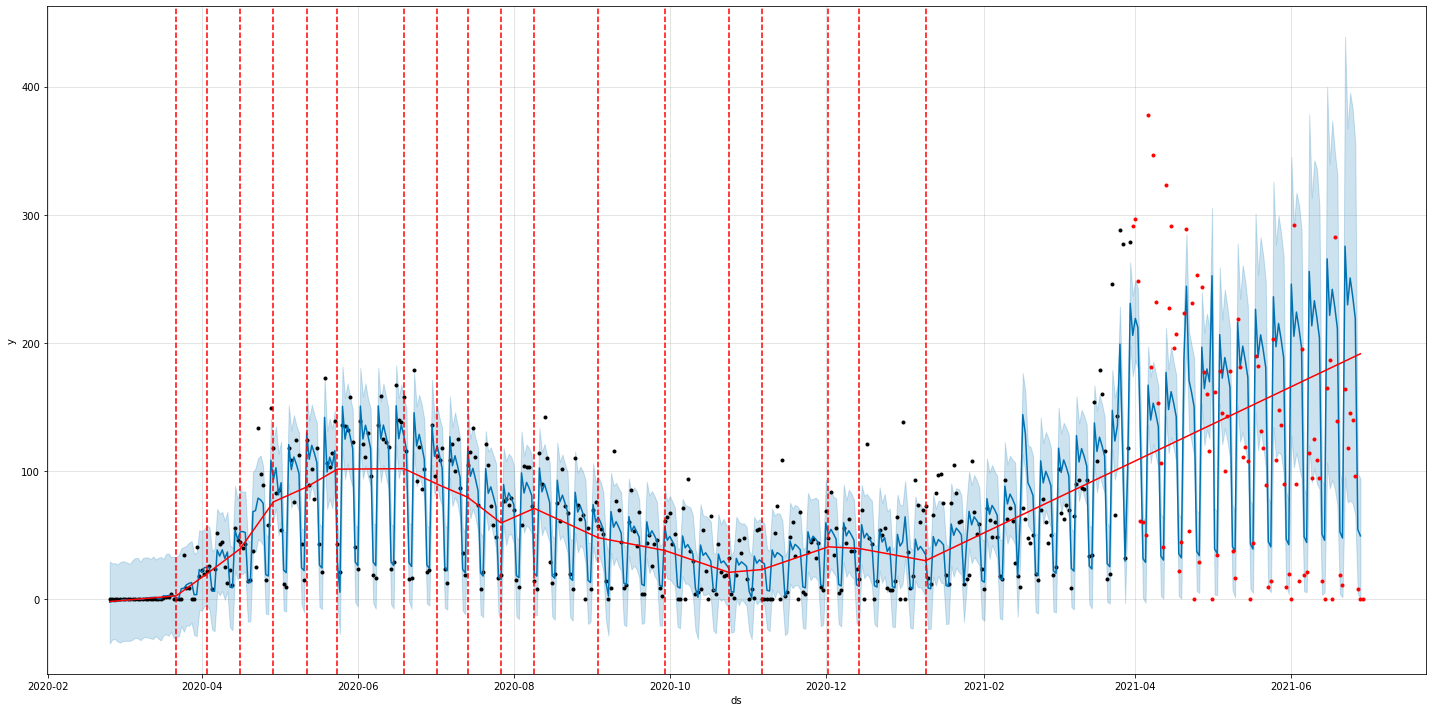

In [22]:
m4 = Prophet(holidays = feriados, seasonality_mode = "multiplicative",
             changepoint_prior_scale = 5)

m4.fit(df_csp_obitos)
df_prev4 = m4.make_future_dataframe(periods = 90)

prev4 = m4.predict(df_prev4)

fig = m4.plot(prev4, figsize = (20,10));
plt.plot(df_csp_obitos_teste.loc[:,"ds"], df_csp_obitos_teste.loc[:,"y"], "r.")
a = add_changepoints_to_plot(fig.gca(), m4, prev4);

Vamos brincar de fazer média movel:

In [23]:
mas_sp = pd.DataFrame()

mas_sp.loc[:,"date"] = cidade_sp.loc[:,"date"]
mas_sp.loc[:,"moving_average_cases"] = cidade_sp.loc[:,"new_confirmed"].rolling(window = 7, center = False).mean()
mas_sp.loc[:,"moving_average_deaths"] = cidade_sp.loc[:,"new_deaths"].rolling(window = 7, center = False).mean()

In [24]:
mas_sp

,date,moving_average_cases,moving_average_deaths
2000296,2020-02-25,NaN,NaN
2000298,2020-02-26,NaN,NaN
2000300,2020-02-27,NaN,NaN
2000302,2020-02-28,NaN,NaN
2000304,2020-02-29,NaN,NaN
...,...,...,...
2271220,2021-06-25,2607.142857,105.142857
2271867,2021-06-26,2551.571429,99.000000
2272514,2021-06-27,2467.142857,97.428571
2273161,2021-06-28,2334.857143,95.857143


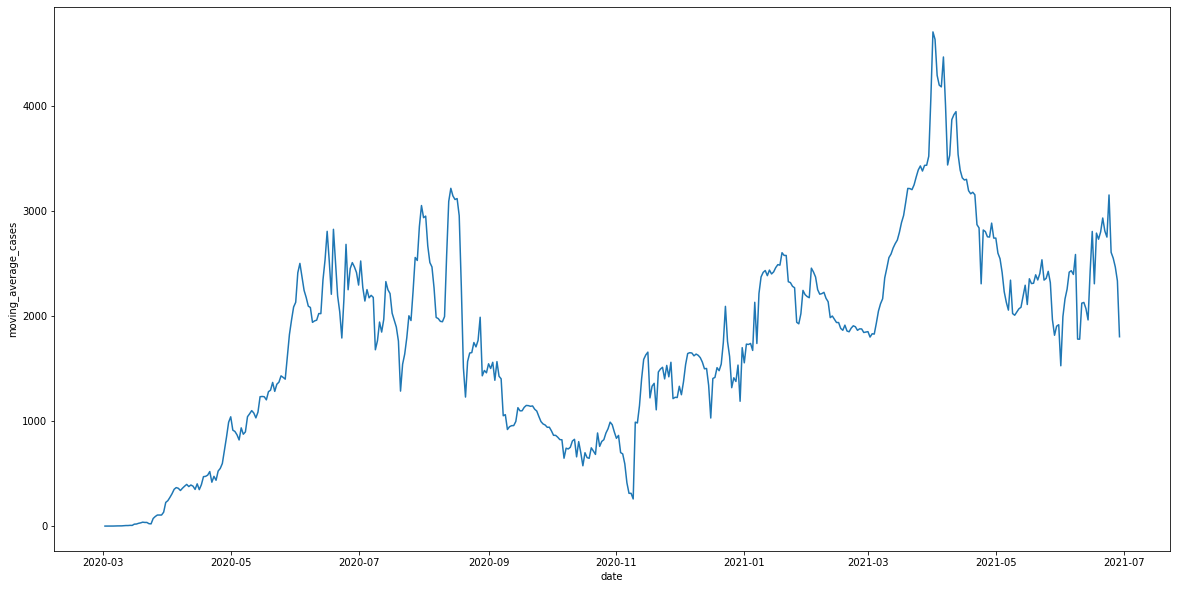

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(data = mas_sp, x = mas_sp.loc[:,"date"], y = mas_sp.loc[:,"moving_average_cases"])

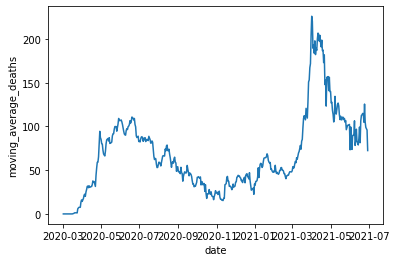

In [26]:
sns.lineplot(data = mas_sp, x = mas_sp.loc[:,"date"], y = mas_sp.loc[:,"moving_average_deaths"])

In [27]:
df_mas_sp = pd.DataFrame()
df_mas_sp.loc[:,"ds"] = mas_sp.loc[:,"date"][:327]
df_mas_sp.loc[:,"y"] = mas_sp.loc[:,"moving_average_cases"][:327]

df_mas_sp_teste = pd.DataFrame()
df_mas_sp_teste.loc[:,"ds"] = mas_sp.loc[:,"date"][327:]
df_mas_sp_teste.loc[:,"y"] = mas_sp.loc[:,"moving_average_cases"][327:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


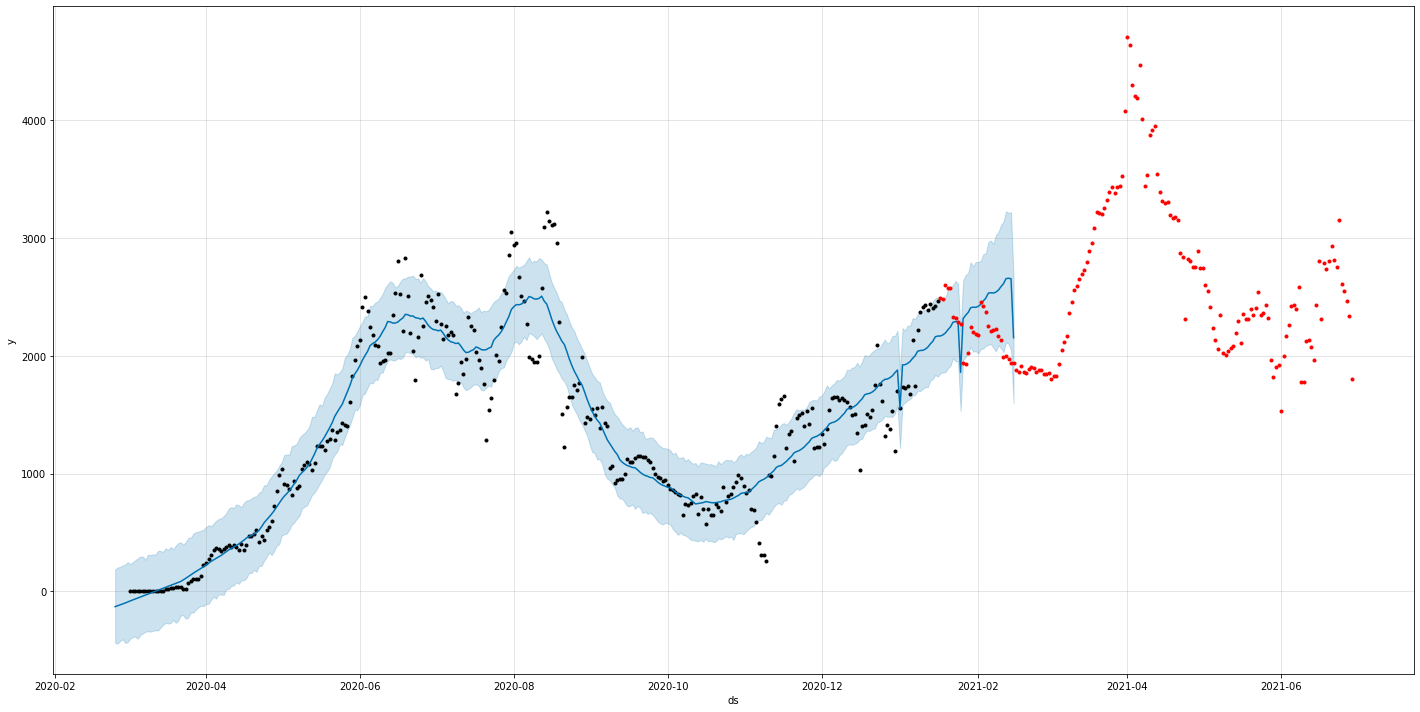

In [28]:
m5 = Prophet(holidays = feriados, seasonality_mode = "multiplicative", changepoint_prior_scale = 1)

m5.fit(df_mas_sp)
df_prev5 = m5.make_future_dataframe(periods = 30)
prev5 = m5.predict(df_prev5)

m5.plot(prev5, figsize = (20,10));
plt.plot(df_mas_sp_teste.loc[:,"ds"], df_mas_sp_teste.loc[:,"y"], "r.")

In [29]:
df_mas_sp = pd.DataFrame()
df_mas_sp.loc[:,"ds"] = mas_sp.loc[:,"date"][:400]
df_mas_sp.loc[:,"y"] = mas_sp.loc[:,"moving_average_deaths"][:400]

df_mas_sp_teste = pd.DataFrame()
df_mas_sp_teste.loc[:,"ds"] = mas_sp.loc[:,"date"][400:]
df_mas_sp_teste.loc[:,"y"] = mas_sp.loc[:,"moving_average_deaths"][400:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


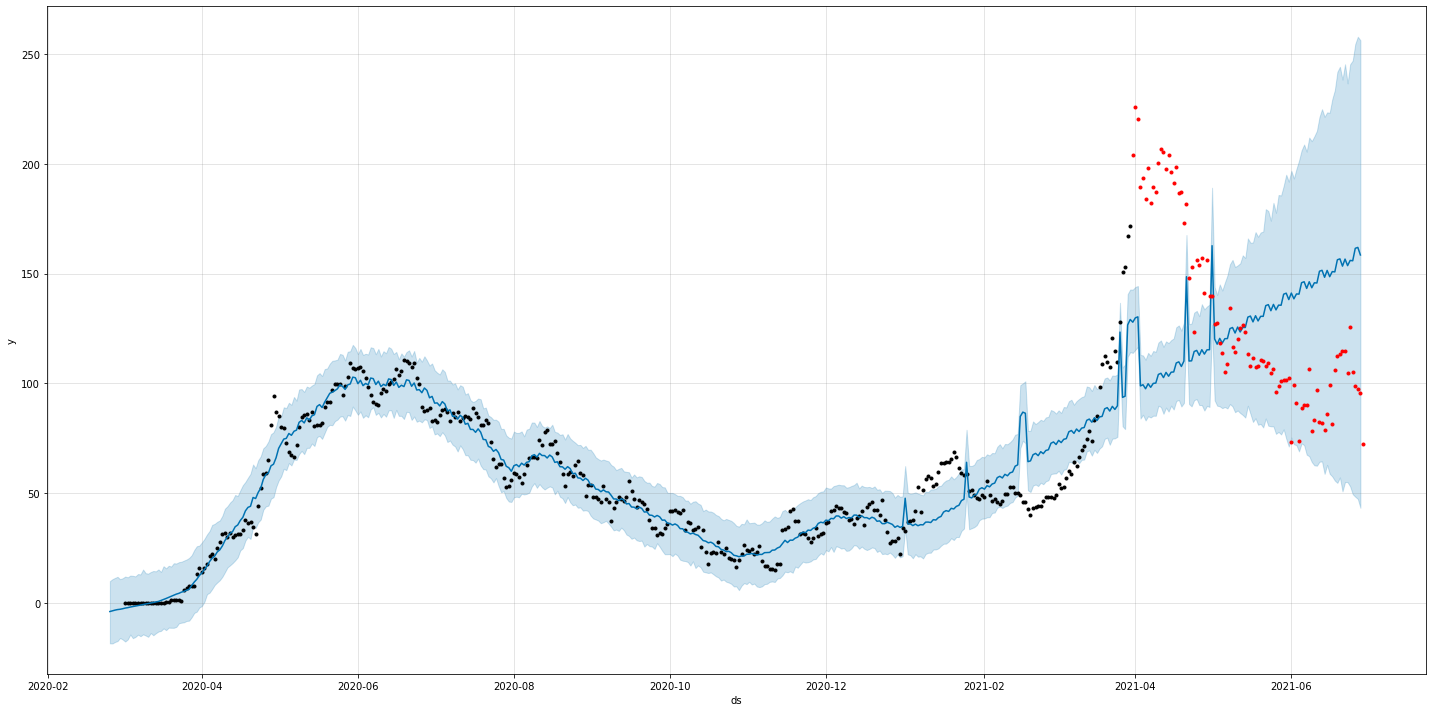

In [30]:
m6 = Prophet(holidays = feriados, seasonality_mode = "multiplicative", changepoint_prior_scale = 2)

m6.fit(df_mas_sp)
df_prev6 = m6.make_future_dataframe(periods = 90)
prev6 = m6.predict(df_prev6)

m6.plot(prev6, figsize = (20,10));
plt.plot(df_mas_sp_teste.loc[:,"ds"], df_mas_sp_teste.loc[:,"y"], "r.")

Mudando de roteiro, vamos examinar as taxas de vacinação:

In [31]:
vacinometro = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/20210630_vacinometro.csv",
                          sep = ";")

vacinometro.head()

,Município,Dose,Total Doses Aplicadas
0,NOVA CASTILHO,UNICA,10
1,TRABIJU,UNICA,10
2,URU,UNICA,11
3,FERNÃO,UNICA,1
4,PAULISTÂNIA,UNICA,11


In [32]:
doses_aplicadas = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/20210630_evolucao_aplicacao_doses.csv",
                              sep = ";")

doses_aplicadas.iloc[:,0] = doses_aplicadas.iloc[:,0].str.replace(" de janeiro de ", "/01/")
doses_aplicadas.iloc[:,0] = doses_aplicadas.iloc[:,0].str.replace(" de fevereiro de ", "/02/")
doses_aplicadas.iloc[:,0] = doses_aplicadas.iloc[:,0].str.replace(" de março de ", "/03/")
doses_aplicadas.iloc[:,0] = doses_aplicadas.iloc[:,0].str.replace(" de abril de ", "/04/")
doses_aplicadas.iloc[:,0] = doses_aplicadas.iloc[:,0].str.replace(" de maio de ", "/05/")
doses_aplicadas.iloc[:,0] = doses_aplicadas.iloc[:,0].str.replace(" de junho de ", "/06/")

doses_aplicadas.iloc[:,0] = pd.to_datetime(doses_aplicadas.iloc[:,0], format = "%d/%m/%Y")

doses_aplicadas = doses_aplicadas.rename(columns = {"Dia de Data Registro Vacina": "date"})

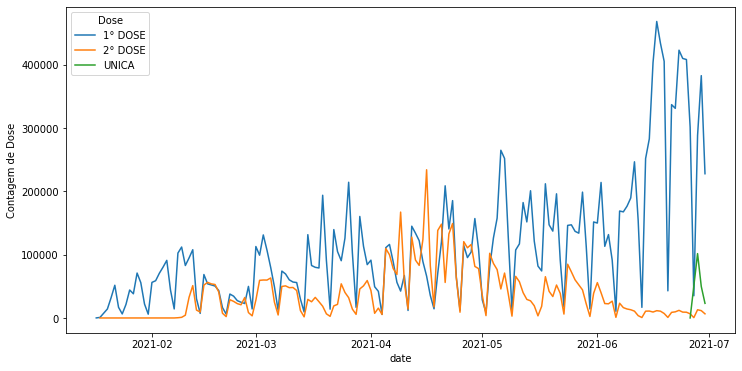

In [33]:
plt.figure(figsize=(12,6))

sns.lineplot(data = doses_aplicadas, x = "date", y = "Contagem de Dose", hue = "Dose")

In [40]:
doses_soma = doses_aplicadas.groupby("date").sum().reset_index()

In [41]:
doses_soma

,date,Contagem de Dose
0,2021-01-17,100
1,2021-01-18,879
2,2021-01-19,7451
3,2021-01-20,14193
4,2021-01-21,32109
...,...,...
160,2021-06-26,307998
161,2021-06-27,35674
162,2021-06-28,402763
163,2021-06-29,444026


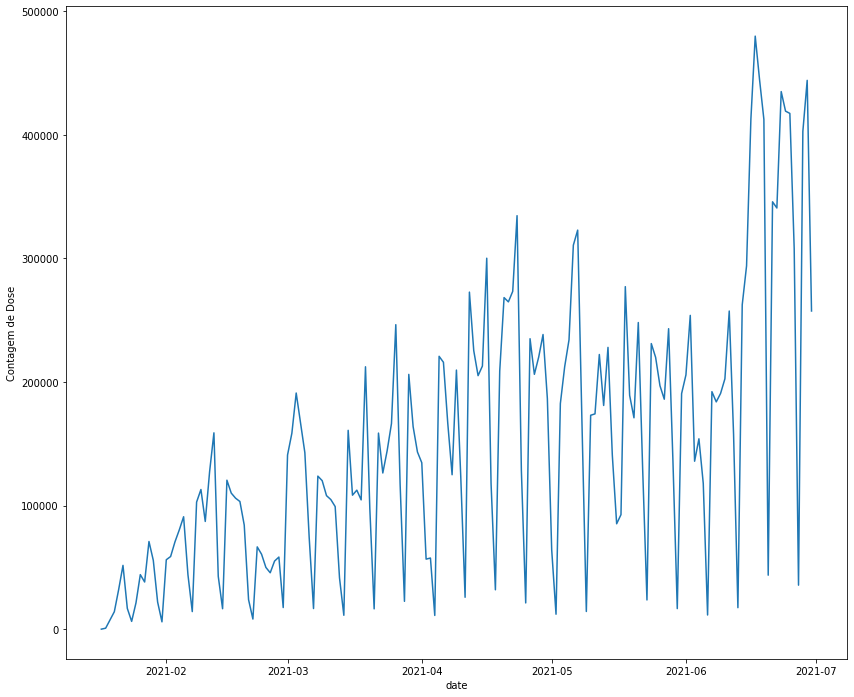

In [42]:
plt.figure(figsize = (14,12))
sns.lineplot(data = doses_soma, x = "date", y = "Contagem de Dose")

In [43]:
pop_sp = casos_full.query("city_ibge_code == '35'").loc[:,"estimated_population"].unique().astype(int)

In [44]:
doses_soma.loc[:,"per_habitant"] = doses_soma.loc[:,"Contagem de Dose"]/pop_sp

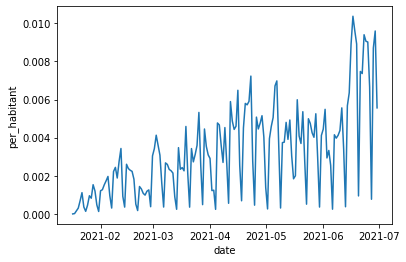

In [45]:
sns.lineplot(data = doses_soma, x = "date", y = "per_habitant")

In [46]:
pop_ita = casos_full.query("city == 'Itapecerica da Serra'").loc[:,"estimated_population"].unique().astype(int)

In [47]:
doses_ita = pd.DataFrame()
doses_ita.loc[:,"date"] = doses_soma.loc[:,"date"]
doses_ita.loc[:,"per_habitant"] = doses_soma.loc[:,"per_habitant"]
doses_ita.loc[:,"doses"] = doses_soma.loc[:,"per_habitant"] * pop_ita

doses_ita

,date,per_habitant,doses
0,2021-01-17,0.000002,0.383808
1,2021-01-18,0.000019,3.373669
2,2021-01-19,0.000161,28.597508
3,2021-01-20,0.000307,54.473819
4,2021-01-21,0.000694,123.236798
...,...,...,...
160,2021-06-26,0.006654,1182.119878
161,2021-06-27,0.000771,136.919540
162,2021-06-28,0.008701,1545.835195
163,2021-06-29,0.009592,1704.205745


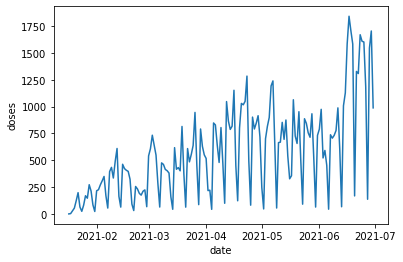

In [48]:
sns.lineplot(data = doses_ita, x = "date", y = "doses")

In [51]:
vacinometro

,Município,Dose,Total Doses Aplicadas
0,NOVA CASTILHO,UNICA,10
1,TRABIJU,UNICA,10
2,URU,UNICA,11
3,FERNÃO,UNICA,1
4,PAULISTÂNIA,UNICA,11
...,...,...,...
1667,SÃO JOSÉ DOS CAMPOS,1° DOSE,310702
1668,SÃO BERNARDO DO CAMPO,1° DOSE,361482
1669,GUARULHOS,1° DOSE,471355
1670,CAMPINAS,1° DOSE,496890


In [50]:
vacinometro_soma = vacinometro.groupby("Município").sum().reset_index()
vacinometro_soma

,Município,Total Doses Aplicadas
0,ADAMANTINA,25055
1,ADOLFO,3052
2,AGUAÍ,17839
3,AGUDOS,22698
4,ALAMBARI,3108
...,...,...
640,ÁGUAS DE SÃO PEDRO,3181
641,ÁLVARES FLORENCE,2867
642,ÁLVARES MACHADO,14440
643,ÁLVARO DE CARVALHO,2209


In [83]:
df_doses = pd.DataFrame()

df_doses.loc[:,"ds"] = doses_soma.loc[:,"date"] # esse aporte de novas vacinas foi muito importante para retomar a aceleração!
df_doses.loc[:,"y"] = doses_soma.loc[:,"Contagem de Dose"]

df_doses_teste = pd.DataFrame()

df_doses_teste.loc[:,"ds"] = doses_soma.loc[:,"date"][149:]
df_doses_teste.loc[:,"y"] = doses_soma.loc[:,"Contagem de Dose"][149:]

df_doses

,ds,y
0,2021-01-17,100
1,2021-01-18,879
2,2021-01-19,7451
3,2021-01-20,14193
4,2021-01-21,32109
...,...,...
160,2021-06-26,307998
161,2021-06-27,35674
162,2021-06-28,402763
163,2021-06-29,444026


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


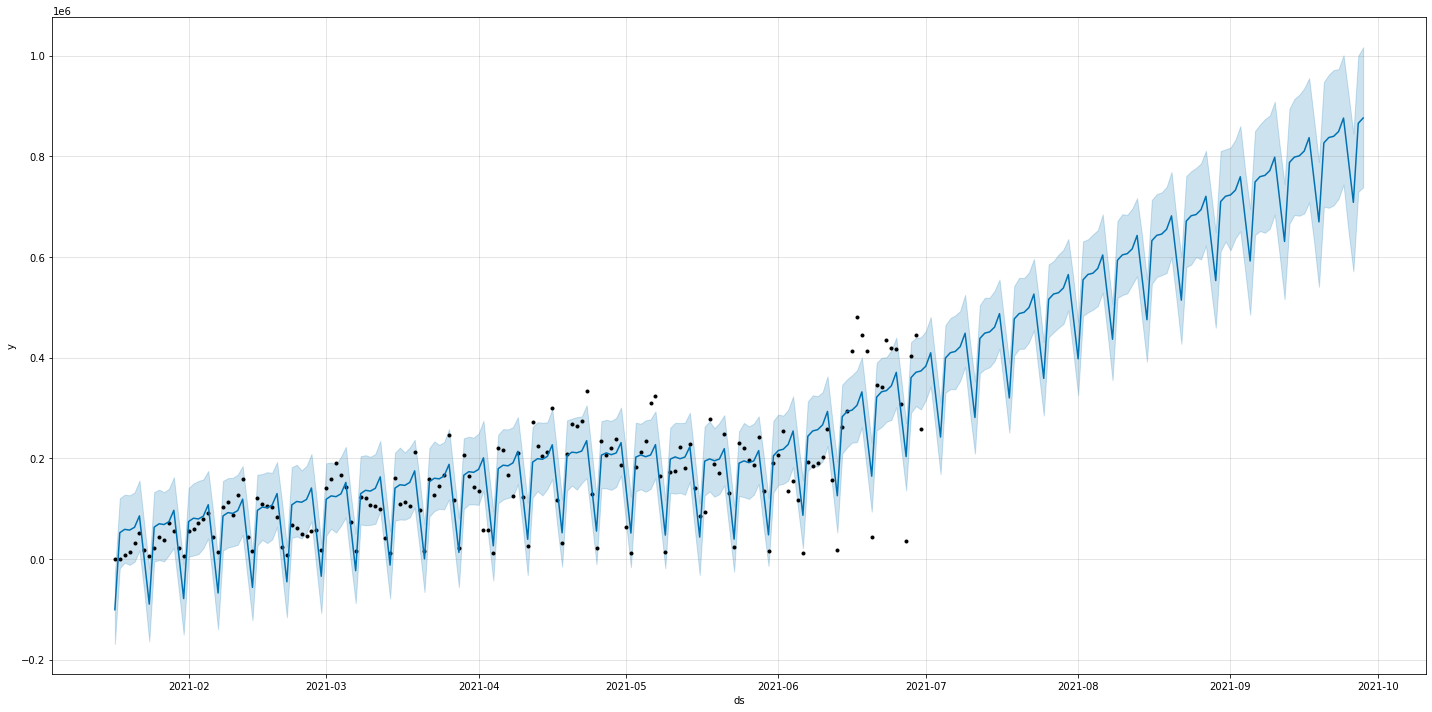

In [86]:
m7 = Prophet(changepoint_prior_scale = 0.5)

m7.fit(df_doses)
df_prev7 = m7.make_future_dataframe(periods = 90)

prev7 = m7.predict(df_prev7)

m7.plot(prev7, figsize = (20,10));
# plt.plot(df_doses_teste.loc[:,"ds"], df_doses_teste.loc[:,"y"], "r.")

In [111]:
doses_soma.loc[:,"soma"] = doses_soma.loc[:,"Contagem de Dose"].cumsum()
doses_soma

,date,Contagem de Dose,per_habitant,soma
0,2021-01-17,100,0.000002,100
1,2021-01-18,879,0.000019,979
2,2021-01-19,7451,0.000161,8430
3,2021-01-20,14193,0.000307,22623
4,2021-01-21,32109,0.000694,54732
...,...,...,...,...
160,2021-06-26,307998,0.006654,23447232
161,2021-06-27,35674,0.000771,23482906
162,2021-06-28,402763,0.008701,23885669
163,2021-06-29,444026,0.009592,24329695


In [116]:
df_doses_soma = pd.DataFrame()

df_doses_soma.loc[:,"ds"] = doses_soma.loc[:,"date"] # esse aporte de novas vacinas foi muito importante para retomar a aceleração!
df_doses_soma.loc[:,"y"] = doses_soma.loc[:,"soma"]

df_doses_soma_teste = pd.DataFrame()

df_doses_soma_teste.loc[:,"ds"] = doses_soma.loc[:,"date"][149:]
df_doses_soma_teste.loc[:,"y"] = doses_soma.loc[:,"soma"][149:]

df_doses_soma

,ds,y
0,2021-01-17,100
1,2021-01-18,979
2,2021-01-19,8430
3,2021-01-20,22623
4,2021-01-21,54732
...,...,...
160,2021-06-26,23447232
161,2021-06-27,23482906
162,2021-06-28,23885669
163,2021-06-29,24329695


In [117]:
df_doses_soma.loc[:,"cap"] = [pop_sp] * 165
df_doses_soma

,ds,y,cap
0,2021-01-17,100,46289333
1,2021-01-18,979,46289333
2,2021-01-19,8430,46289333
3,2021-01-20,22623,46289333
4,2021-01-21,54732,46289333
...,...,...,...
160,2021-06-26,23447232,46289333
161,2021-06-27,23482906,46289333
162,2021-06-28,23885669,46289333
163,2021-06-29,24329695,46289333


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


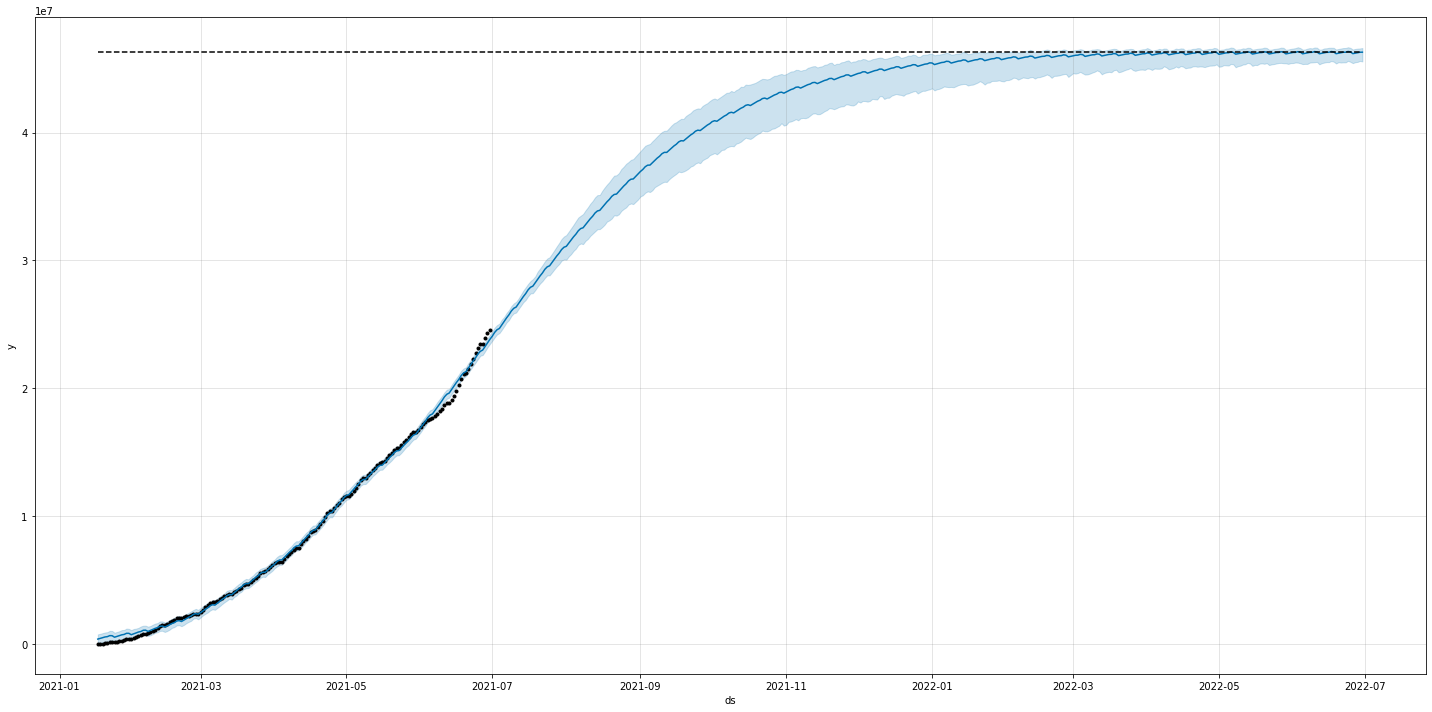

In [123]:
m7 = Prophet(growth = "logistic", changepoint_prior_scale = 0.1)

m7.fit(df_doses_soma)
df_prev7 = m7.make_future_dataframe(periods = 365)
df_prev7.loc[:,"cap"] = [pop_sp] * (165 + 365)

prev7 = m7.predict(df_prev7)

m7.plot(prev7, figsize = (20,10));
# plt.plot(df_doses_teste.loc[:,"ds"], df_doses_teste.loc[:,"y"], "r.")